## IPL first inning score prediction

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
import pickle

In [114]:
df=pd.read_csv('ipl.csv',parse_dates=['date'])

In [115]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [116]:
df['venue'].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket St

## Renaming new stadium names

In [123]:
for i,data in df.iterrows():
    if data['venue']=="Sardar Patel Stadium, Motera":
        df.at[i,'venue']="Narendra Modi Stadium, Motera"

In [124]:
df['venue'].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Narendra Modi Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket S

In [125]:
most_common_venue=['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
        'Brabourne Stadium','Narendra Modi Stadium, Motera',
        'Maharashtra Cricket Association Stadium',
       'Saurashtra Cricket Association Stadium']

In [126]:
len(most_common_venue)

13

In [127]:
for i,data in df.iterrows():
    if data['venue'] in most_common_venue:
        df.at[i,'venue']=data['venue']
    else:
        df.at[i,'venue']='Other'

In [128]:
df['venue'].value_counts()

Other                                         19226
M Chinnaswamy Stadium                          7443
Feroz Shah Kotla                               7068
Eden Gardens                                   7049
Wankhede Stadium                               7048
MA Chidambaram Stadium, Chepauk                5972
Rajiv Gandhi International Stadium, Uppal      5827
Punjab Cricket Association Stadium, Mohali     4247
Sawai Mansingh Stadium                         4110
Dr DY Patil Sports Academy                     2088
Maharashtra Cricket Association Stadium        1843
Narendra Modi Stadium, Motera                  1484
Brabourne Stadium                              1380
Saurashtra Cricket Association Stadium         1229
Name: venue, dtype: int64

In [129]:
df['venue'].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Other', 'Brabourne Stadium', 'Narendra Modi Stadium, Motera',
       'Maharashtra Cricket Association Stadium',
       'Saurashtra Cricket Association Stadium'], dtype=object)

In [130]:
df=df[['date','venue','bat_team','bowl_team','runs','wickets','overs','runs_last_5','wickets_last_5','total']]

In [131]:
df.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [132]:
df=df[df['overs']>=5.0]

In [133]:
df.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [134]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [135]:
current_teams=['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals','Mumbai Indians', 'Kings XI Punjab',
               'Royal Challengers Bangalore', 'Delhi Daredevils','Sunrisers Hyderabad']

In [136]:
df=df[(df['bat_team'].isin(current_teams)) & (df['bowl_team'].isin(current_teams))]

In [137]:
df.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [138]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Sunrisers Hyderabad'], dtype=object)

In [139]:
df['bowl_team'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Rajasthan Royals', 'Mumbai Indians',
       'Chennai Super Kings', 'Kolkata Knight Riders',
       'Sunrisers Hyderabad'], dtype=object)

In [140]:
df.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [141]:
encoded_df=pd.get_dummies(df,columns=['venue','bat_team','bowl_team'])

In [142]:
encoded_df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,venue_Brabourne Stadium,venue_Dr DY Patil Sports Academy,venue_Eden Gardens,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [143]:
encoded_df.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'venue_Brabourne Stadium', 'venue_Dr DY Patil Sports Academy',
       'venue_Eden Gardens', 'venue_Feroz Shah Kotla',
       'venue_M Chinnaswamy Stadium', 'venue_MA Chidambaram Stadium, Chepauk',
       'venue_Maharashtra Cricket Association Stadium',
       'venue_Narendra Modi Stadium, Motera', 'venue_Other',
       'venue_Punjab Cricket Association Stadium, Mohali',
       'venue_Rajiv Gandhi International Stadium, Uppal',
       'venue_Sawai Mansingh Stadium', 'venue_Wankhede Stadium',
       'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight R

In [144]:
encoded_df2=encoded_df[['date','venue_Brabourne Stadium', 'venue_Dr DY Patil Sports Academy',
       'venue_Eden Gardens', 'venue_Feroz Shah Kotla',
       'venue_M Chinnaswamy Stadium', 'venue_MA Chidambaram Stadium, Chepauk',
       'venue_Maharashtra Cricket Association Stadium','venue_Narendra Modi Stadium, Motera', 'venue_Other',
       'venue_Punjab Cricket Association Stadium, Mohali',
       'venue_Rajiv Gandhi International Stadium, Uppal',
       'venue_Sawai Mansingh Stadium', 'venue_Wankhede Stadium','bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad','runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total']]

In [145]:
encoded_df2.head()

,date,venue_Brabourne Stadium,venue_Dr DY Patil Sports Academy,venue_Eden Gardens,venue_Feroz Shah Kotla,venue_M Chinnaswamy Stadium,"venue_MA Chidambaram Stadium, Chepauk",venue_Maharashtra Cricket Association Stadium,"venue_Narendra Modi Stadium, Motera",venue_Other,...,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,0,0,0,0,1,0,0,0,0,...,0,0,1,0,61,0,5.1,59,0,222
33,2008-04-18,0,0,0,0,1,0,0,0,0,...,0,0,1,0,61,1,5.2,59,1,222
34,2008-04-18,0,0,0,0,1,0,0,0,0,...,0,0,1,0,61,1,5.3,59,1,222
35,2008-04-18,0,0,0,0,1,0,0,0,0,...,0,0,1,0,61,1,5.4,59,1,222
36,2008-04-18,0,0,0,0,1,0,0,0,0,...,0,0,1,0,61,1,5.5,58,1,222


In [146]:
x=encoded_df2.drop('total',axis=1)

In [147]:
x.head()

,date,venue_Brabourne Stadium,venue_Dr DY Patil Sports Academy,venue_Eden Gardens,venue_Feroz Shah Kotla,venue_M Chinnaswamy Stadium,"venue_MA Chidambaram Stadium, Chepauk",venue_Maharashtra Cricket Association Stadium,"venue_Narendra Modi Stadium, Motera",venue_Other,...,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,runs,wickets,overs,runs_last_5,wickets_last_5
32,2008-04-18,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,61,0,5.1,59,0
33,2008-04-18,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,61,1,5.2,59,1
34,2008-04-18,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,61,1,5.3,59,1
35,2008-04-18,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,61,1,5.4,59,1
36,2008-04-18,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,61,1,5.5,58,1


In [148]:
y=encoded_df2[['date','total']]

In [149]:
y.head()

,date,total
32,2008-04-18,222
33,2008-04-18,222
34,2008-04-18,222
35,2008-04-18,222
36,2008-04-18,222


In [150]:
x_train=x[(x['date'].dt.year)<2017]
x_test=x[(x['date'].dt.year>=2017)]

In [151]:
x_train.shape

(37330, 35)

In [152]:
x_test.shape

(2778, 35)

In [153]:
y_train=y[(y['date'].dt.year)<2017]
y_test=y[(y['date'].dt.year>=2017)]

In [154]:
y_train.shape

(37330, 2)

In [155]:
y_test.shape

(2778, 2)

In [156]:
x_train.drop('date',axis=1,inplace=True)
x_test.drop('date',axis=1,inplace=True)
y_train.drop('date',axis=1,inplace=True)
y_test.drop('date',axis=1,inplace=True)

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [157]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

In [158]:
ridge=Ridge()
parameters={'alpha':[10,20,30,40,50]}
ridge_regressor=RandomizedSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(x_train,y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=None, solver='auto',
                                   tol=0.001),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'alpha': [10, 20, 30, 40, 50]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='neg_mean_squared_error',
                   verbose=0)

In [159]:
ridge_regressor.best_params_

{'alpha': 50}

In [160]:
ridge_regressor.best_score_

-333.8395860943819

In [161]:
prediction = ridge_regressor.predict(x_test)

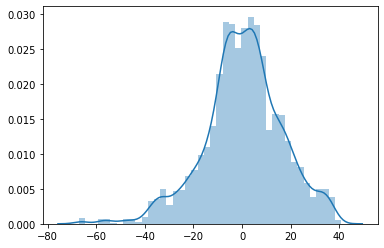

In [162]:
sns.distplot(y_test-prediction)

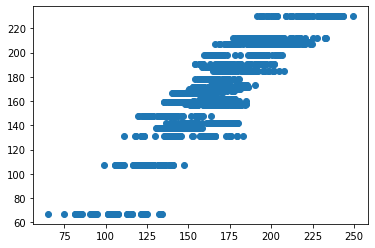

In [163]:
plt.scatter(prediction,y_test)

In [164]:
print('MAE : ',metrics.mean_absolute_error(y_test,prediction))
print('MSE : ',metrics.mean_squared_error(y_test,prediction))
print('RMSE : ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))
print('R SQUARED : ',round(metrics.r2_score(y_test,prediction),2))

MAE :  12.37872143533597
MSE :  263.3253498042562
RMSE :  16.227302604076137
R SQUARED :  0.74


In [165]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

MAE :  12.391799646492398
MSE :  263.94556814100173
RMSE :  16.246401698253116
R SQUARED :  0.74


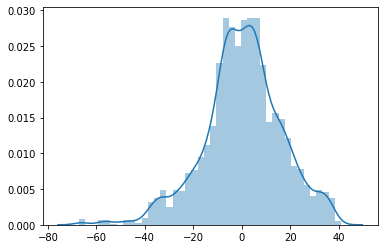

In [166]:
lr = LinearRegression()
lr.fit(x_train,y_train)
prediction = lr.predict(x_test)
sns.distplot(y_test-prediction)
print('MAE : ',metrics.mean_absolute_error(y_test,prediction))
print('MSE : ',metrics.mean_squared_error(y_test,prediction))
print('RMSE : ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))
print('R SQUARED : ',round(metrics.r2_score(y_test,prediction),2))

In [167]:
rf = RandomForestRegressor(n_estimators=50)
rf.fit(x_train,y_train)
prediction = rf.predict(x_test)
print('MAE : ',metrics.mean_absolute_error(y_test,prediction))
print('MSE : ',metrics.mean_squared_error(y_test,prediction))
print('RMSE : ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))
print('R SQUARED : ',round(metrics.r2_score(y_test,prediction),2))

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


MAE :  14.277120230381568
MSE :  358.29016558675306
RMSE :  18.92855423921101
R SQUARED :  0.65


In [168]:
pickle.dump(ridge_regressor, open('ipl_model.pkl','wb'))